In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping


In [2]:
# Load Dataset

(X_train, y_train), (X_test, y_test) = mnist.load_data()

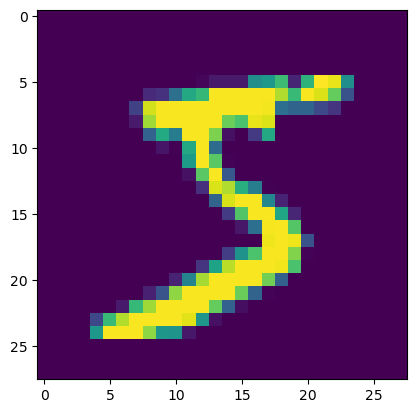

In [3]:
plt.imshow(X_train[0])

In [4]:
# Normalize

X_train = X_train / 255.0
X_test = X_test / 255.0

In [5]:
# Reshape for CNN


X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)


In [6]:
# One Hot Encoding


y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [7]:
# Data Augmentation


datagen = ImageDataGenerator(

    rotation_range=10,

    zoom_range=0.1,

    width_shift_range=0.1,

    height_shift_range=0.1

)

datagen.fit(X_train)

In [8]:
# CNN Model


model = Sequential([

    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1), strides=(1,1),padding='same',),

    MaxPooling2D(2,2),

    Dropout(0.25),

    Conv2D(64, (3,3),strides=(1,1),padding='same', activation='relu'),

    MaxPooling2D(2,2),

    Dropout(0.25),

    Flatten(),
    
    Dense(256, activation='relu'),

    Dropout(0.5),

    Dense(128, activation='relu'),

    Dropout(0.5),

    Dense(10, activation='softmax')

])

c:\Users\mishr\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Compile


model.compile(

    optimizer='adam',

    loss='categorical_crossentropy',

    metrics=['accuracy']

)

In [10]:
# Early Stopping


early_stop = EarlyStopping(

    monitor='val_loss',

    patience=3

)

In [11]:
# Train


history = model.fit(

    datagen.flow(X_train,y_train,batch_size=64),

    epochs=15,

    validation_data=(X_test,y_test),

    callbacks=[early_stop]

)

Epoch 1/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 70s 69ms/step - accuracy: 0.8112 - loss: 0.5786 - val_accuracy: 0.9816 - val_loss: 0.0592
Epoch 2/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 64s 68ms/step - accuracy: 0.9410 - loss: 0.2074 - val_accuracy: 0.9896 - val_loss: 0.0329
Epoch 3/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 76s 81ms/step - accuracy: 0.9539 - loss: 0.1599 - val_accuracy: 0.9883 - val_loss: 0.0323
Epoch 4/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 62s 66ms/step - accuracy: 0.9610 - loss: 0.1380 - val_accuracy: 0.9918 - val_loss: 0.0236
Epoch 5/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 61s 65ms/step - accuracy: 0.9660 - loss: 0.1226 - val_accuracy: 0.9926 - val_loss: 0.0208
Epoch 6/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 62s 66ms/step - accuracy: 0.9679 - loss: 0.1145 - val_accuracy: 0.9910 - val_loss: 0.0242
Epoch 7/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 63s 68ms/step - accuracy: 0.9720 - loss: 0.1009 - val_accuracy: 0.9916 - val_loss: 0.0228
Epoch 8/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 64s 68ms/step - accuracy: 0.9716 - loss: 0.0988 - 

In [12]:
# Evaluate


loss, acc = model.evaluate(X_test,y_test)

print("\nFinal Accuracy:", acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9935 - loss: 0.0177

Final Accuracy: 0.9934999942779541


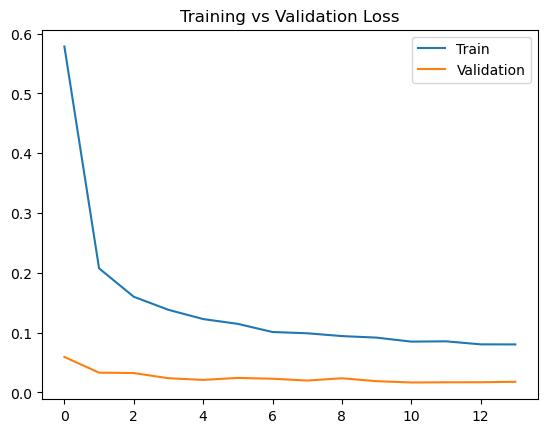

In [13]:
# Plot Loss


plt.plot(history.history['loss'])

plt.plot(history.history['val_loss'])

plt.title("Training vs Validation Loss")

plt.legend(["Train","Validation"])

plt.show()

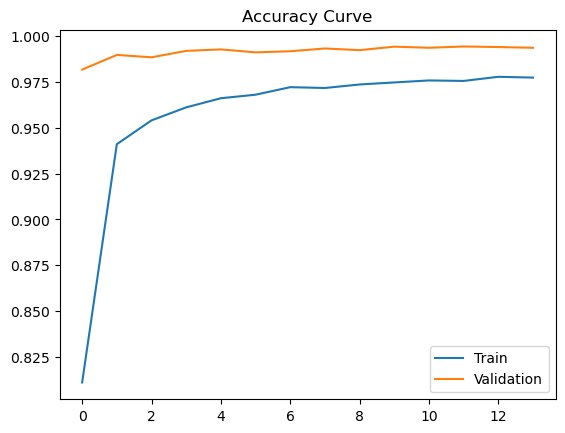

In [14]:
# PLOT ACCURACY

plt.plot(history.history['accuracy'])

plt.plot(history.history['val_accuracy'])

plt.title("Accuracy Curve")

plt.legend(["Train","Validation"])

plt.show()